# Neural Network

## Dependency

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
plt.style.use('default')

## Concept

If network has $s_j$ units in layer $j$ and $s_{j + 1}$ units inlayer $j + 1$, then $\Theta^{(j)}$ will be of dimension $s_{j + 1} \times (s_{j} + 1)$. $+ 1$ because $s_{j + 1}$ has additional **bias unit**. $\Theta^{(j)}$ is a matrix of **weights** controlling function mapping from layer $j$ to layer $j + 1$.

When a neural network has **no hidden layers** and has only **one unit in output layer**,

- If output layer is **linear activation**, it's **linear regression** because $y = I (\Theta x) = \Theta x$.
- If output layer is **sigmoid activation**, it's **logistic regression** because $y = \sigma(\Theta x)$ where $\sigma = \frac{1}{1 + e^{(-\Theta x)}}$.

## Cost Function

In **multi-class classification** where $n$ is the number of data, $L$ is the number of layers in neural network including input and output layers, $s_{l}$ is the number of units (not including bias unit) in layer $l$, $K$ is the number of classes, $\Theta$ is the weight matrices, $h_{\Theta}(x)$ is the output of neural network and $\in \mathbb{R}^K$, $(h_{\Theta}(x))_i$ is $i^{th}$ output, and $J(\Theta)$ is the cost.

$$
J(\Theta) = - \frac{1}{n} \left[ \sum_{i = 1}^{n} \sum_{k = 1}^{K} y_{k}^{(i)} \log (h_{\Theta}(x^{(i)}))_{k} + (1 - y_{k}^{(i)}) \log (1 - (h_{\Theta}(x^{(i)}))_{k}) \right] + \frac{\lambda}{2n} \sum_{l = 1}^{L} \sum_{i = 1}^{s_{l}} \sum_{j = 1}^{s_{l + 1}} (\Theta_{ji}^{(l)})^2
$$

This math takes the form of,

$$
\text{Regularized cost} = \text{Cost} + \lambda \times \text{Regularization}
$$

The first $\sum_{i = 1}^{n} \sum_{k = 1}^{K} y_{k}^{(i)}$ part says that we get the **log-likelihood** by each class and sum up all the $n$ items and divide it by $n$ to get the average cost.

The second $\sum_{l = 1}^{L} \sum_{i = 1}^{s_{l}} \sum_{j = 1}^{s_{l + 1}}$ says that we get all the weight parameters in the neural network to regularize them.

## Backpropagation

**Backpropagation** is neural network terminology for minimizing the cost function. The goal is to compute,

$$
\underset{\Theta}{\min} J(\Theta)
$$

It means that we want to minimize the cost function $J$ using an optimal set of parameters $\Theta$.

## Gradient Descent

### Logistic Regression Gradient Descent

$$
z = w^T x + b
$$
$$
\hat{y} = a = \sigma(z)
$$
$$
\mathcal{L}(a, y) = -(y \log(a) + (1 - y) \log(1 - a))
$$

When $p = 2$,

Computation graph is,

$x_1, w_1, x_2, w_2, b \rightarrow z = w_1 x_1 + w_2 x_2 + b \rightarrow \hat{y} = a = \sigma(z) \rightarrow \mathcal{L}(a, y)$ 

By changing $w_1, w_2, b$, we want to reduce $\mathcal{L}(a, y)$

The loss function is,

$$
\mathcal{L}(a, y) = -(y \log(a) + (1 - y) \log(1 - a))
$$

Derivative of loss function with respect to $a$ is, by derivative of log and chain rule,

$$
\frac{d \mathcal{L}}{da} = -y \frac{1}{a} - (1 - y) \frac{1}{1 - a} (-1)
$$
$$
= \frac{-y}{a} + \frac{1 - y}{1 - a}
$$
$$
= \frac{-y(1 - a)}{a(1 - a)} + \frac{(1 - y)a}{(1 - a)a}
$$
$$
= \frac{-y + ay + a - ay}{a(1 - a)}
$$

So we have,

$$
\frac{d \mathcal{L}}{da} = \frac{a - y}{a(1 - a)}
$$

Next, derivative of $a$ with respect to $z$, because $a = \sigma(z)$,

$$
\frac{da}{dz} = \frac{d}{dz} \sigma(z)
$$

Because derivative of sigmoid function is $\frac{d}{dz} \sigma(z) = \sigma(z)(1 - \sigma(z)$ and $a = \sigma(z)$,

$$
\frac{da}{dz} = a (1 - a)
$$

Finally, derivative of loss function with respect to $z$ is, by chain rule,

$$
\frac{d \mathcal{L}}{dz} = \frac{d \mathcal{L}}{da} \frac{da}{dz}
$$
$$
= \frac{a - y}{a(1 - a)} a (1 - a)
$$

So we have,

$$
\frac{d \mathcal{L}}{dz} = a - y 
$$

Now, we get derivative with respect to parameters, $\frac{d \mathcal{L}}{d w_1}$, $\frac{d \mathcal{L}}{d w_2}$, and $\frac{d \mathcal{L}}{db}$. By chain rule,

$$
\frac{d \mathcal{L}}{d w_1} = \frac{d \mathcal{L}}{da} \frac{da}{dz} \frac{dz}{dw_1}
$$

Because $z = w_1 x_1 + w_2 x_2 + b$, derivative of $z$ with respect to $w_1$ is,

$$
\frac{dz}{dw_1} = x_1
$$

Likewise,

$$
\frac{dz}{dw_2} = x_2
$$
$$
\frac{dz}{db} = 1
$$

So finally derivative of loss function is each parameter is,

$$
\frac{d \mathcal{L}}{dw_1} = \frac{a - y}{a(1 - a)} a (1 - a) x_1 = (a - y) x_1
$$
$$
\frac{d \mathcal{L}}{dw_2} = \frac{a - y}{a(1 - a)} a (1 - a) x_2 = (a - y) x_2
$$
$$
\frac{d \mathcal{L}}{db} = \frac{a - y}{a(1 - a)} a (1 - a) 1 = (a - y)
$$

Because we got the gradient with respect to parameters, finally we can do gradient descent by

$$
w_1 = w_1 - \alpha \frac{d \mathcal{L}}{d w_1} = w_1 - \alpha (a - y) x_1
$$
$$
w_2 = w_2 - \alpha \frac{d \mathcal{L}}{d w_2} = w_2 - \alpha (a - y) x_2
$$
$$
b = b - \alpha \frac{d \mathcal{L}}{d b} = b - \alpha (a - y)
$$

### Pseudocode for Gradient Descent in Neural Network

When neural network architecture uses logistic regression, $p = 2$, $n$ is the number of data, and use the simplified expression of $dw_1$ for the derivative $\frac{d \mathcal{L}}{dw_1}$,

```
# Initialize variables to accumulate sums to compute average
J = 0, dw_1 = 0, dw_2 = 0, db = 0

# Iterate each example
for i = 1 to n
  
  # Forward propagation to compute loss
  z_i = w x_i + b
  a_i = sigma(z_i)
  J += -(y_i log(a_i) + (1 - y_i)log(1 - a_i))
  
  # Backpropagation to compute derivative
  dz_i = a_i - y_i
  dw_1 += x_1_i dz_i
  dw_2 += x_2_i dz_i
  db += dz_i
  
# Compute average
J /= n, dw_1 /= n, dw_2 /= n, db /= n 

# Gradient descent
w_1 = w_1 - alpha dw_1
w_2 = w_2 - alpha dw_2
b = b - alpha db
```

## Vectorization

**Whenever possible, avoid explicit for-loops** in coding neural network

2 layers neural network representation

## Neural Network Representation

**Input layer** doesn't count for layers in neural network. For example, logistic regression in neural network representation can be said to be 1 layer neural network, becuase the 1 layer is for the output layer. 1 hidden layer neural network is 2 layers neural network; 1 layer for the hidden layer, and 1 layer for the output layer.

$l$ is the number of layers

$n^{[l]}$ is the number of units (nodes) in layer $l$. Layer 0 is the inpute layer, so $n^{[0]}$ is the number of features.

$a^{[l]}$ is the number of activations in layer $l$. $a^{[0]}$ is the input, so $x = a^{[0]}$. $a^{[L]}$ is the output.

$w^{[l]}$ and $b^{[l]}$ are the weights for $z^{[l]}$

Forward propagation is,

$$
Z^{[l]} = W^{[l]} A^{[l - 1]} + b^{[l]}
$$
$$
A^{[l]} = g^{[l]}(Z^{[l]})
$$

The above is valid for the input layer too, because $X = A^{[0]}$.

```
A = X

for i from 1 to L

    Z_l = W_l A_(l - 1) + b_l
    A_l = g_l(Z_l)
```

Dimension of weights

$$
W^{[l]}: (n^{[l]} \times n^{[l - 1]})
$$

For example, from 2 features in the input layer to 3 units in the 1st hidden layer, as a single exmple, $n^{[0]} = 2$, $n^{[1]} = 3$

$$
z^{[1]} = w^{[1]} x + b^{[1]}
$$
$$
(3 \times 1) = (3 \times 2) (2 \times 1) + (2 \times 1)
$$

**Bias** is always 1 column, so entire example vectorized implementation, **broadcasting** happens to bias. For example, $m$ is the number of examples (data)

$$
Z^{[l]} = W^{[l]} A^{[l - 1]} + b^{[l]}
$$
$$
(n^{[l]} \times m) = (n^{[l]} \times n^{[l - 1]}) (n^{[l - 1]} \times m) + (n^{[l]} \times 1)
$$

In linear algebra, you cannot do element-wise addtion between $(n^{[l]} \times m)$ and $(n^{[l]} \times 1)$. So the bias column is applied to each column in $W A$. It is **broadcasting**. To understand broadcasting, for example, if we have $(2 \times 2)$ $W$ and $(2 \times 2)$ $X$ and $(2 \times 1)$ $b$,

$$
W = 
\begin{bmatrix}
a & b\\
c & d
\end{bmatrix}
$$
$$
X = 
\begin{bmatrix}
e & f\\
g & h
\end{bmatrix}
$$
$$
b = 
\begin{bmatrix}
i\\
j
\end{bmatrix}
$$
$$
W X + b =
\begin{bmatrix}
(ae + bg) + i & (af + bh) + i\\
(ce + dg) + j & (cf + dh) + j
\end{bmatrix}
$$

Notice that $i$ and $j$ are repeated in each column.

## Activation Function

tanh

relu

leaky relu, g(z) = max(0.01z, z)

why we need to use non-linear activation. Composition of 2 linear function is a linear function. If the data has a non-linearity, only linear activation neural network cannot express the relationship.

Derivative of activation function

Sigmoid function, $g'(z) = a (1 - a)$

Hypobolic tangent function, $1 - (tanh(z))^2$, $g'(z) = 1 - a^2$

relu, $g'(z) = 0$ if z < 0, 1 if z > 0, undefined if z = 0

Leaky relu, g'(z) = 0.01 if z < 0, 1 if z > 0

## Backpropagation for neural network with hidden layer

https://www.coursera.org/learn/neural-networks-deep-learning/lecture/6dDj7/backpropagation-intuition-optional

## Random weights initialization

## Propagation

Forward propagation for layer $l$

Input $a^{[l - 1]}$. Output $a^{[l]}$ to compute final output, and output cache $z^{[l]}$ for backpropagation.

$$
Z^{[l]} = W^{[l]} A^{[l - 1]} + b^{[l]}
$$
$$
A^{[l]} = g^{[l]}(Z^{[l]})
$$

Backpropagation for layer $l$

Input $da^{l}$. Output $da^{[l - 1]}$ to compute $dz^{[l]}$, and output $dW^{[l]}$ and $db^{[l]}$ for gradient descent. Below $*$ is element-wise multiplication. $\text{np}$ is numpy. $m$ is the number of data.

$$
dZ^{[l]} = dA^{[l]} * g^{[l]}(Z^{[l]})
$$

Or

$$
dZ^{[l]} = dA^{[l]} * g'(Z^{[l]})
$$

$$
dW^{[l]} = \frac{d \mathcal{L}}{dW^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l - 1]T}
$$
$$
db^{[l]} = \frac{d \mathcal{L}}{db^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)} = \frac{1}{m} \text{np.sum}(dZ^{[l]}, \text{axis=1, keepdim=True})
$$
$$
dA^{[l - 1]} = \frac{d \mathcal{L}}{dA^{[l - 1]}} = W^{[l]T} dZ^{[l]}
$$

Proof???

## Resource

- [Machine Learning by Stanford University | Coursera](https://www.coursera.org/learn/machine-learning)
- [Deep Learning Specialization | Coursera](https://www.coursera.org/specializations/deep-learning)

## Note

$X = (p \times n)$, $Y = (1 \times n)$

Logistic regression $\hat{y} = \sigma(w^T x + b)$

Loss function is for single data error, $l(\hat{y^{(i)}}, y^{(i)})$

Cost function is for sum of loss functions for the entire dataset, $J(w, b)$

https://github.com/HeroKillerEver/coursera-deep-learning/blob/master/Neural%20Networks%20and%20Deep%20Learning/Building%20your%20Deep%20Neural%20Network%20-%20Step%20by%20Step/Building%2Byour%2BDeep%2BNeural%2BNetwork%2B-%2BStep%2Bby%2BStep%2Bv8.ipynb

https://github.com/HeroKillerEver/coursera-deep-learning/blob/master/Neural%20Networks%20and%20Deep%20Learning/Building%20your%20Deep%20Neural%20Network%20-%20Step%20by%20Step/testCases_v4.py

https://github.com/HeroKillerEver/coursera-deep-learning/blob/master/Neural%20Networks%20and%20Deep%20Learning/Deep%20Neural%20Network%20Application-Image%20Classification/Deep%2BNeural%2BNetwork%2B-%2BApplication%2Bv8.ipynb

https://github.com/HeroKillerEver/coursera-deep-learning/blob/master/Neural%20Networks%20and%20Deep%20Learning/Deep%20Neural%20Network%20Application-Image%20Classification/dnn_app_utils_v3.py

## Coding Neural Network Logistic Regression

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def initialize_parameters_with_zeros(dim):
    w = np.zeros(shape=(dim, 1))
    b = 0
    return w, b


def propagate(w, b, X, Y):
    """
    n is the number of data. p is the number of features

    Argument:
    w: (p x 1) weights
    b: bias scalar
    X: (p x n) input data
    Y: (1 x n) output data
    
    Return:
    cost: a scalar, negative log-likelihood
    dw: gradient of the loss with respect to w, (p x 1), same shape as w
    db: gradient of the loss with respect to b, (1 x 1), same shape as b
    """
    n = X.shape[1]
    
    # Forward propagation
    # Compute activation function
    A = sigmoid(np.dot(w.T, X) + b)
    # Compute cost function
    cost = (- 1 / n) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))
    cost = np.squeeze(cost)
    
    # Backpropagation
    dw = (1 / n) * np.dot(X, (A - Y).T)
    db = (1 / n) * np.sum(A - Y)
    grads = {
        'dw': dw,
        'db': db
    }
    
    return grads, cost


def optimize(w, b, X, Y, num_iterations, learning_rate):
    """
    This function repeats gradient descent to update weights in neural network
    Argumet:
    w: (p x 1) Weights
    b: scalar bias
    X: (p x n) input data
    Y: (1 x n) output data
    num_iterations: Number of iterations to repeat gradient descent
    learning_rate: Learning rate for gradient descent
    
    Return:
    params: Python dictionary containing the final parameters weights and bias
    grads: Python dictionary containing the final gradient of weights and bias with respect to cost function
    costs: List of costs from iterations
    """
    costs = []
    
    for i in range(num_iterations):
        
        # Do forward propagation and backpropagation to compute gradients
        grads, cost = propagate(w, b, X, Y)
        
        # Update weights and bias by using the gradients
        w = w - learning_rate * grads['dw']
        b = b - learning_rate * grads['db']
        
        # Record cost
        if i % 100 == 0:
            costs.append(cost)
    
    params = {
        'w': w,
        'b': b
    }
    
    return params, grads, costs

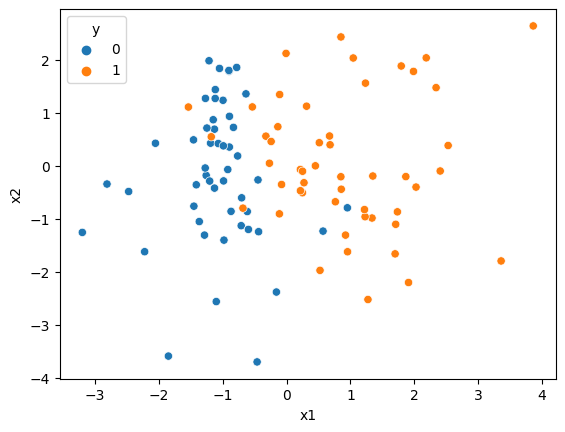

In [27]:
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    random_state=0
)

df = pd.DataFrame(X, columns=['x1', 'x2'])
df['y'] = y

sns.scatterplot(x='x1', y='x2', data=df, hue='y')
plt.show()

In [31]:
model = LogisticRegression()
model.fit(X, y)

print(f'Intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')

Intercept: [0.65479702]
Coefficients: [[2.48256096 0.4595847 ]]


In [60]:
w = np.array([
    [0.01],
    [0.01]
])
b = 0.5

params, grads, cost = optimize(w, b, X.T, y.T, num_iterations=10000, learning_rate=0.01)

print(f'Intercept: {params["b"]}')
print(f'Coefficients: {params["w"]}')

Intercept: 0.8821201934552619
Coefficients: [[3.1280681 ]
 [0.64042661]]


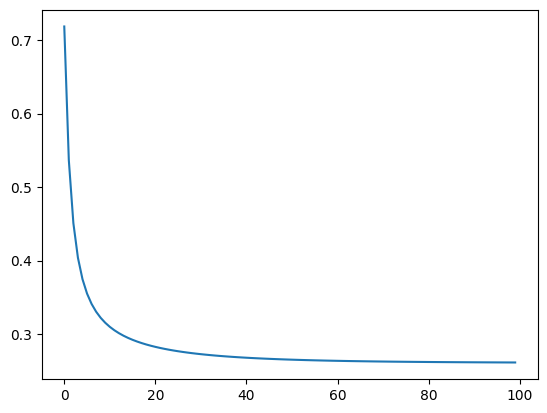

In [61]:
plt.plot(cost)

## Deep Neural Network Binary Classification

All the hidden layers use **Relu activation**. ReLu is $max(0, Z)$ where $Z = W A + b$. It's binary classification because the output layer uses the sigmoid activation.

Parameters (weights $W$ and bias $b$) are initialized with random numbers. $W$ are random small number, and $b$ are all zeros.

Deep layers are,

Linear ($W, A, b$) &rarr; Relu activation &rarr; Linear ($W, A, b$) &rarr; Relu &rarr; ... &rarr; Linear($W, A, b$) &rarr; Sigmoid activation

It uses the following cost function, called **cross-entropy cost**, because of binary classification. $a^{[L]} = \hat{y}$ because $a^{[L]}$ is the output of the sigmoid activation at the output layer.

$$
- \frac{1}{m} \sum_{i = 1}^{m} \left[ y^{(i)} \log (a^{[L](i)}) + (1 - y^{(i)}) \log (1 - a^{[L](i)}) \right]
$$

Initialize backpropagation with $\frac{\partial \mathcal{L}}{\partial A^{[L]}}$

Derivative of cost function with respect to $A$ is,

$$
- \frac{y}{a} + \frac{1 - y}{1 - a} = \frac{-y(1 - a) + (1 - y)a}{a(1 - a)} = \frac{-y + ya + a - ay}{a(1 - a)} = \frac{a - y}{a(1 - a)}
$$

Updating parameters is gradient descent.

$$
W^{[l]} = W^{[l]} - \alpha dW^{[l]}
$$
$$
b^{[l]} = b^{[l]} - \alpha db^{[l]}
$$

where $dW^{[l]} = \frac{\partial \mathcal{L}}{\partial W^{[l]}}$ and $db^{[l]} = \frac{\partial \mathcal{L}}{\partial b^{[l]}}$

Algorithm for neural network is,

```
1. Initialize parameters (weights and biases)
2. Repeat the following until fully trained
  i. Forward propagation to compute predicted Y
  ii. Compute cost between actual Y and predicted Y
  iii. Backward propagation to compute gradients
  iv. Update parameters by gradient descent
3. Predict by forward propagation with the updated parameters
```

In [44]:
def relu(Z):
    A = np.maximum(0, Z)
    cache = Z
    return A, cache


def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    return dZ


def sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))
    cache = Z
    return A, cache


def sigmoid_backward(dA, cache):
    Z = cache
    s = 1 / (1 + np.exp(-Z))
    dZ = dA * s * (1 - s)
    return dZ


def initialize_parameters(layer_dims, seed):
    """
    Argument:
    layer_dims: List of integers representing dimenstions of each layer
    Return:
    parameters: Dictionary containing weight matrices for W (n_l, n_{l - 1}) and bias columns (n_l, 1)
    """
    np.random.seed(seed)
    parameters = {}
    L = len(layer_dims)
    # Start from 1 to avoid index out of bound
    for l in range(1, L):
        # Initialize weights with small numbers so multiply by 0.01
        parameters[f'W{l}'] = 0.01 * np.random.randn(layer_dims[l], layer_dims[l - 1])
        # Initialize bias with zero
        parameters[f'b{l}'] = np.zeros((layer_dims[l], 1))
    return parameters


def linear_forward(A, W, b):
    Z = np.dot(W, A) + b
    cache = (A, W, b)
    return Z, cache


def linear_activation_forward(A_prev, W, b, activation):
    Z, linear_cache = linear_forward(A_prev, W, b)

    if activation == 'relu':
        A, activation_cache = relu(Z)
    elif activation == 'sigmoid':
        A, activation_cache = sigmoid(Z)
        
    cache = (linear_cache, activation_cache)
    
    return A, cache


def forward_propagation(X, parameters):
    caches = []
    # A^0 = X
    A = X
    # // 2 because parameters are doubled by w and b
    L = len(parameters) // 2
    
    # Hidden layers
    for l in range(1, L):
        A, cache = linear_activation_forward(
            A,
            parameters[f'W{l}'],
            parameters[f'b{l}'],
            # All the hidden layers use ReLU in this example
            activation='relu'
        )
        caches.append(cache)
        
    # Output layer
    # AL = sigmoid(W^L A^{L - 1} + b^L) = \hat{Y}
    AL, cache = linear_activation_forward(
        A,
        parameters[f'W{L}'],
        parameters[f'b{L}'],
        # Use sigmoid activation because this example is binary classification
        activation='sigmoid'
    )
    caches.append(cache)
    
    return AL, caches


def compute_cost(AL, Y):
    """
    Argument:
    AL: Output of sigmoid activation, so equal to \hat{y}
    Y: (1, number of examples)
    """
    m = Y.shape[1]
    # Compute cross-entropy cost
    # np.multiply is element-wise multiplication
    cost = (-1 / m) * np.sum(np.multiply(Y, np.log(AL)) + np.multiply(1 - Y, np.log(1 - AL)))
    # np.squeeze removes all the length 1 dimensions, so [[1]] goes to 1, shape is ()
    cost = np.squeeze(cost)
    return cost


def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW = (1 / m) * np.dot(dZ, A_prev.T)
    db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)
    return dA_prev, dW, db


def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    
    if activation == 'relu':
        dZ = relu_backward(dA, activation_cache)
    elif activation == 'sigmoid':
        dZ = sigmoid_backward(dA, activation_cache)
    
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db


def backward_propagation(AL, Y, caches):
    # Gradients
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    # Make AL have the same shape as AL (Y hat)
    Y = Y.reshape(AL.shape)
    
    # Derivative of cost function with respect to A (sigmoid activation at the output layer)
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    current_cache = caches[-1]
    grads[f'dA{L - 1}'], grads[f'dA{L}'], grads[f'db{L}'] = linear_activation_backward(
        dAL,
        current_cache,
        'sigmoid'
    )
    
    # e.g. for i in reversed(range(3)): (2, 1, 0), 
    # So it's (0, 1, 2) and then reverse it
    for l in reversed(range(L - 1)):
        current_cache = caches[l]
        grads[f'dA{l}'], grads[f'dW{l + 1}'], grads[f'db{l + 1}'] = linear_activation_backward(
            grads[f'dA{l + 1}'],
            current_cache,
            'relu'
        )
    
    return grads


def update_parameters(parameters, grads, learning_rate):
    # // 2 because parameters are doubled by w and b
    L = len(parameters) // 2
    
    for l in range(L):
        # Gradient descent
        parameters[f'W{l + 1}'] = parameters[f'W{l + 1}'] - learning_rate * grads[f'dW{l + 1}']
        parameters[f'b{l + 1}'] = parameters[f'b{l + 1}'] - learning_rate * grads[f'db{l + 1}']
        
    return parameters


def predict(X, y, parameters):
    m = X.shape[1]
    n = len(parameters) // 2
    p = np.zeros((1, m))
    
    # Forward propagation to compute Y hat
    # In prediction, we don't need caches
    probas, _ = forward_propagation(X, parameters)
    
    # Convert the predicted probability to binary prediction
    for i in range(probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
            
    print(f'Accuracy: {np.sum((p == y) / m)}')
    
    return p

In [ ]:
# When input has 100 features, and to make 4 layers neural network
# Last element needs to be 1 because of binary classification
layer_dims = [100, 20, 7, 5, 1]
learning_rate = 0.001
num_iterations = 1000
np.random.seed(0)

# X: (p by n)
X = np.array([])
# Y: (1 by n)
Y = np.array([])

# Initialize parameters
parameters = initialize_parameters(layer_dims)

# Store cost computed from each iteration
costs = []

# Keep training until num_iterations times
for _ in range(num_iterations):
    
    # Forward propagation to compute Y hat
    AL, caches = forward_propagation(X, parameters)
    
    # Compute cost
    cost = compute_cost(AL, Y)
    
    # Backward propagation to compute gradients
    grads = backward_propagation(AL, Y, caches)
    
    # Update parameters by gradient descent
    parameters = update_parameters(parameters, grads, learning_rate)
    
    # Save cost
    costs.append(cost)

# Visualize cost reduced over training iterations
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(learning_rate))
plt.show()

## Test function

In [4]:
def linear_forward_test_case():
    np.random.seed(1)
    """
    X = np.array([[-1.02387576, 1.12397796],
 [-1.62328545, 0.64667545],
 [-1.74314104, -0.59664964]])
    W = np.array([[ 0.74505627, 1.97611078, -1.24412333]])
    b = np.array([[1]])
    """
    A = np.random.randn(3,2)
    W = np.random.randn(1,3)
    b = np.random.randn(1,1)
    
    return A, W, b

def linear_activation_forward_test_case():
    """
    X = np.array([[-1.02387576, 1.12397796],
 [-1.62328545, 0.64667545],
 [-1.74314104, -0.59664964]])
    W = np.array([[ 0.74505627, 1.97611078, -1.24412333]])
    b = 5
    """
    np.random.seed(2)
    A_prev = np.random.randn(3,2)
    W = np.random.randn(1,3)
    b = np.random.randn(1,1)
    return A_prev, W, b

def L_model_forward_test_case():
    """
    X = np.array([[-1.02387576, 1.12397796],
 [-1.62328545, 0.64667545],
 [-1.74314104, -0.59664964]])
    parameters = {'W1': np.array([[ 1.62434536, -0.61175641, -0.52817175],
        [-1.07296862,  0.86540763, -2.3015387 ]]),
 'W2': np.array([[ 1.74481176, -0.7612069 ]]),
 'b1': np.array([[ 0.],
        [ 0.]]),
 'b2': np.array([[ 0.]])}
    """
    np.random.seed(1)
    X = np.random.randn(4,2)
    W1 = np.random.randn(3,4)
    b1 = np.random.randn(3,1)
    W2 = np.random.randn(1,3)
    b2 = np.random.randn(1,1)
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return X, parameters

def compute_cost_test_case():
    Y = np.asarray([[1, 1, 1]])
    aL = np.array([[.8,.9,0.4]])
    
    return Y, aL

def linear_backward_test_case():
    """
    z, linear_cache = (np.array([[-0.8019545 ,  3.85763489]]), (np.array([[-1.02387576,  1.12397796],
       [-1.62328545,  0.64667545],
       [-1.74314104, -0.59664964]]), np.array([[ 0.74505627,  1.97611078, -1.24412333]]), np.array([[1]]))
    """
    np.random.seed(1)
    dZ = np.random.randn(1,2)
    A = np.random.randn(3,2)
    W = np.random.randn(1,3)
    b = np.random.randn(1,1)
    linear_cache = (A, W, b)
    return dZ, linear_cache

def linear_activation_backward_test_case():
    """
    aL, linear_activation_cache = (np.array([[ 3.1980455 ,  7.85763489]]), ((np.array([[-1.02387576,  1.12397796], [-1.62328545,  0.64667545], [-1.74314104, -0.59664964]]), np.array([[ 0.74505627,  1.97611078, -1.24412333]]), 5), np.array([[ 3.1980455 ,  7.85763489]])))
    """
    np.random.seed(2)
    dA = np.random.randn(1,2)
    A = np.random.randn(3,2)
    W = np.random.randn(1,3)
    b = np.random.randn(1,1)
    Z = np.random.randn(1,2)
    linear_cache = (A, W, b)
    activation_cache = Z
    linear_activation_cache = (linear_cache, activation_cache)
    
    return dA, linear_activation_cache

def L_model_backward_test_case():
    """
    X = np.random.rand(3,2)
    Y = np.array([[1, 1]])
    parameters = {'W1': np.array([[ 1.78862847,  0.43650985,  0.09649747]]), 'b1': np.array([[ 0.]])}
    aL, caches = (np.array([[ 0.60298372,  0.87182628]]), [((np.array([[ 0.20445225,  0.87811744],
           [ 0.02738759,  0.67046751],
           [ 0.4173048 ,  0.55868983]]),
    np.array([[ 1.78862847,  0.43650985,  0.09649747]]),
    np.array([[ 0.]])),
   np.array([[ 0.41791293,  1.91720367]]))])
   """
    np.random.seed(3)
    AL = np.random.randn(1, 2)
    Y = np.array([[1, 0]])

    A1 = np.random.randn(4,2)
    W1 = np.random.randn(3,4)
    b1 = np.random.randn(3,1)
    Z1 = np.random.randn(3,2)
    linear_cache_activation_1 = ((A1, W1, b1), Z1)

    A2 = np.random.randn(3,2)
    W2 = np.random.randn(1,3)
    b2 = np.random.randn(1,1)
    Z2 = np.random.randn(1,2)
    linear_cache_activation_2 = ((A2, W2, b2), Z2)

    caches = (linear_cache_activation_1, linear_cache_activation_2)

    return AL, Y, caches

def update_parameters_test_case():
    """
    parameters = {'W1': np.array([[ 1.78862847,  0.43650985,  0.09649747],
        [-1.8634927 , -0.2773882 , -0.35475898],
        [-0.08274148, -0.62700068, -0.04381817],
        [-0.47721803, -1.31386475,  0.88462238]]),
 'W2': np.array([[ 0.88131804,  1.70957306,  0.05003364, -0.40467741],
        [-0.54535995, -1.54647732,  0.98236743, -1.10106763],
        [-1.18504653, -0.2056499 ,  1.48614836,  0.23671627]]),
 'W3': np.array([[-1.02378514, -0.7129932 ,  0.62524497],
        [-0.16051336, -0.76883635, -0.23003072]]),
 'b1': np.array([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]),
 'b2': np.array([[ 0.],
        [ 0.],
        [ 0.]]),
 'b3': np.array([[ 0.],
        [ 0.]])}
    grads = {'dW1': np.array([[ 0.63070583,  0.66482653,  0.18308507],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]]),
 'dW2': np.array([[ 1.62934255,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ]]),
 'dW3': np.array([[-1.40260776,  0.        ,  0.        ]]),
 'da1': np.array([[ 0.70760786,  0.65063504],
        [ 0.17268975,  0.15878569],
        [ 0.03817582,  0.03510211]]),
 'da2': np.array([[ 0.39561478,  0.36376198],
        [ 0.7674101 ,  0.70562233],
        [ 0.0224596 ,  0.02065127],
        [-0.18165561, -0.16702967]]),
 'da3': np.array([[ 0.44888991,  0.41274769],
        [ 0.31261975,  0.28744927],
        [-0.27414557, -0.25207283]]),
 'db1': 0.75937676204411464,
 'db2': 0.86163759922811056,
 'db3': -0.84161956022334572}
    """
    np.random.seed(2)
    W1 = np.random.randn(3,4)
    b1 = np.random.randn(3,1)
    W2 = np.random.randn(1,3)
    b2 = np.random.randn(1,1)
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    np.random.seed(3)
    dW1 = np.random.randn(3,4)
    db1 = np.random.randn(3,1)
    dW2 = np.random.randn(1,3)
    db2 = np.random.randn(1,1)
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return parameters, grads


def L_model_forward_test_case_2hidden():
    np.random.seed(6)
    X = np.random.randn(5,4)
    W1 = np.random.randn(4,5)
    b1 = np.random.randn(4,1)
    W2 = np.random.randn(3,4)
    b2 = np.random.randn(3,1)
    W3 = np.random.randn(1,3)
    b3 = np.random.randn(1,1)
  
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return X, parameters

def print_grads(grads):
    print ("dW1 = "+ str(grads["dW1"]))
    print ("db1 = "+ str(grads["db1"]))
    print ("dA1 = "+ str(grads["dA1"]))     
    